In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("D:\\JUPYTER NOTEBOOK\\ventas-por-factura.csv")

In [4]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [5]:
df.tail()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,"-12,70"
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,"720,00"
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,"298,78"
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,1176,"1488,00"
25952,537999,12/9/2020 11:44:00,NaN,United Kingdom,-223,"0,00"


In [6]:
df.shape

(25953, 6)

In [7]:
df.columns

Index(['N° de factura', 'Fecha de factura', 'ID Cliente', 'País', 'Cantidad',
       'Monto'],
      dtype='object')

In [8]:
df.dtypes


N° de factura        object
Fecha de factura     object
ID Cliente          float64
País                 object
Cantidad              int64
Monto                object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of       N° de factura     Fecha de factura  ID Cliente            País  \
0            548370   3/30/2021 16:14:00     15528.0  United Kingdom   
1            575767  11/11/2021 11:11:00     17348.0  United Kingdom   
2           C570727  10/12/2021 11:32:00     12471.0         Germany   
3            549106    4/6/2021 12:08:00     17045.0  United Kingdom   
4            573112  10/27/2021 15:33:00     16416.0  United Kingdom   
...             ...                  ...         ...             ...   
25948       C556518   6/13/2021 10:53:00     16794.0  United Kingdom   
25949        553060   5/13/2021 10:44:00     15826.0  United Kingdom   
25950        577049  11/17/2021 13:58:00     17397.0  United Kingdom   
25951        550122   4/14/2021 12:39:00     12931.0  United Kingdom   
25952        537999   12/9/2020 11:44:00         NaN  United Kingdom   

       Cantidad    Monto  
0           123   229,33  
1           163   209,73  
2            -1    -1,

In [10]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['n°_de_factura', 'fecha_de_factura', 'id_cliente', 'país', 'cantidad',
       'monto'],
      dtype='object')

In [11]:
df = df.rename(columns={
    'n°_de_factura': 'invoice_no',
    'fecha_de_factura': 'invoice_date',
    'id_cliente': 'customer_id',
    'país': 'country',
    'cantidad': 'quantity',
    'monto': 'amount'
})


In [12]:
df.columns

Index(['invoice_no', 'invoice_date', 'customer_id', 'country', 'quantity',
       'amount'],
      dtype='object')

In [13]:
#A extra add because all data is missing and value became zero
df['quantity'] = (
    df['quantity']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df['amount'] = (
    df['amount']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('₹', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.strip()
)


In [14]:
#B NOW Convert to Numeric
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
#C Handle Missing Values (SAFE)
df = df.dropna(subset=['invoice_date', 'customer_id'])
df['quantity'] = df['quantity'].fillna(0)
df['amount'] = df['amount'].fillna(0)
#D Create total_sales
df['total_sales'] = df['quantity'] * df['amount']
#E DO NOT DELETE ALL DATA ❌
df = df[(df['quantity'] >= 0) & (df['amount'] >= 0)]
#F VERIFY (THIS SHOULD NOT BE ZERO)
df.shape
df[['quantity','amount','total_sales']].describe()





,quantity,amount,total_sales
count,18570.000000,1.857000e+04,1.857000e+04
mean,279.071459,4.799774e+04,1.610140e+08
std,975.795133,1.676432e+05,1.088183e+10
min,1.000000,0.000000e+00,0.000000e+00
25%,74.000000,1.576850e+04,1.212361e+06
50%,155.000000,3.028650e+04,4.548411e+06
75%,290.750000,4.712575e+04,1.293130e+07
max,80995.000000,1.684696e+07,1.364520e+12


In [15]:
df.shape


(18570, 7)

In [16]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)


In [17]:
df.columns

Index(['invoice_no', 'invoice_date', 'customer_id', 'country', 'quantity',
       'amount', 'total_sales'],
      dtype='object')

In [18]:
df.duplicated().sum()
 

np.int64(4)

In [19]:
df = df.drop_duplicates()


In [20]:
df.isnull()

,invoice_no,invoice_date,customer_id,country,quantity,amount,total_sales
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
25945,False,False,False,False,False,False,False
25946,False,False,False,False,False,False,False
25949,False,False,False,False,False,False,False
25950,False,False,False,False,False,False,False


In [21]:
#Check missing values
df.isnull().sum()


invoice_no      0
invoice_date    0
customer_id     0
country         0
quantity        0
amount          0
total_sales     0
dtype: int64

In [22]:
df = df.dropna(subset=['customer_id', 'invoice_date'])
#This ensures every record belongs to a valid customer and date.


In [23]:
#Your numerical columns are quantity and amount
df['quantity'] = df['quantity'].fillna(0)
df['amount'] = df['amount'].fillna(0)


In [24]:
#🔹 Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')


In [25]:
#🔹 Remove rows where date conversion failed
df = df.dropna(subset=['invoice_date'])


In [26]:
#🔹 Total Sales
df['total_sales'] = df['quantity'] * df['amount']


In [27]:
#🔹 Date Features
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['month_name'] = df['invoice_date'].dt.month_name()


In [28]:
#📌 STEP A: Check Data Types
df.dtypes


invoice_no              object
invoice_date    datetime64[ns]
customer_id            float64
country                 object
quantity                 int64
amount                   int64
total_sales              int64
year                     int32
month                    int32
month_name              object
dtype: object

In [29]:
# 📌 STEP B: Convert quantity and amount to NUMERIC
# Use pd.to_numeric() with errors='coerce'
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')



In [30]:
# 📌 STEP C: Handle NaN Values Created During Conversion
df['quantity'] = df['quantity'].fillna(0)
df['amount'] = df['amount'].fillna(0)


In [31]:
#🔹 Remove zero or negative values
df = df[(df['quantity'] > 0) & (df['amount'] > 0)]


In [32]:
df.dtypes


invoice_no              object
invoice_date    datetime64[ns]
customer_id            float64
country                 object
quantity                 int64
amount                   int64
total_sales              int64
year                     int32
month                    int32
month_name              object
dtype: object

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18562 entries, 0 to 25951
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    18562 non-null  object        
 1   invoice_date  18562 non-null  datetime64[ns]
 2   customer_id   18562 non-null  float64       
 3   country       18562 non-null  object        
 4   quantity      18562 non-null  int64         
 5   amount        18562 non-null  int64         
 6   total_sales   18562 non-null  int64         
 7   year          18562 non-null  int32         
 8   month         18562 non-null  int32         
 9   month_name    18562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(3)
memory usage: 1.4+ MB


In [34]:
df.describe()


,invoice_date,customer_id,quantity,amount,total_sales,year,month
count,18562,18562.000000,18562.000000,1.856200e+04,1.856200e+04,18562.000000,18562.000000
mean,2021-07-01 13:53:06.393707520,15266.266782,278.448605,4.800888e+04,1.610814e+08,2020.924523,7.424523
min,2020-12-01 08:26:00,12346.000000,1.000000,3.800000e+01,3.800000e+01,2020.000000,1.000000
25%,2021-03-30 13:56:15,13777.000000,74.000000,1.577000e+04,1.213438e+06,2021.000000,5.000000
50%,2021-07-12 14:21:30,15176.500000,155.000000,3.028750e+04,4.549763e+06,2021.000000,8.000000
75%,2021-10-12 13:16:15,16779.000000,290.000000,4.712575e+04,1.293130e+07,2021.000000,11.000000
max,2021-12-09 12:50:00,18287.000000,80995.000000,1.684696e+07,1.364520e+12,2021.000000,12.000000
std,NaN,1733.952850,971.837519,1.676773e+05,1.088417e+10,0.264166,3.437613


In [35]:
df.isnull().sum()


invoice_no      0
invoice_date    0
customer_id     0
country         0
quantity        0
amount          0
total_sales     0
year            0
month           0
month_name      0
dtype: int64

In [36]:
df.head()


,invoice_no,invoice_date,customer_id,country,quantity,amount,total_sales,year,month,month_name
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,22933,2820759,2021,3,March
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,20973,3418599,2021,11,November
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,3995,3995,2021,4,April
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,34483,12310431,2021,10,October
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,19998,1819818,2021,11,November


In [37]:
df.to_csv("cleaned_ecommerce_sales.csv", index=False)


In [38]:
#🔹 12.1 Business Overview (KPIs)
#Total Revenue
total_revenue = df['total_sales'].sum()
total_revenue


np.int64(2989993094279)

In [39]:
#Total Orders
total_orders = df['invoice_no'].nunique()
total_orders


18532

In [40]:
# Total Customers
total_customers = df['customer_id'].nunique()
total_customers


4338

In [41]:
#  Average Order Value (AOV)
aov = total_revenue / total_orders
aov


np.float64(161342169.99131233)

In [42]:
df.shape


(18562, 10)

In [43]:
df.head()


,invoice_no,invoice_date,customer_id,country,quantity,amount,total_sales,year,month,month_name
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,22933,2820759,2021,3,March
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,20973,3418599,2021,11,November
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,3995,3995,2021,4,April
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,34483,12310431,2021,10,October
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,19998,1819818,2021,11,November


In [44]:
df[['quantity', 'amount']].describe()


,quantity,amount
count,18562.000000,1.856200e+04
mean,278.448605,4.800888e+04
std,971.837519,1.676773e+05
min,1.000000,3.800000e+01
25%,74.000000,1.577000e+04
50%,155.000000,3.028750e+04
75%,290.000000,4.712575e+04
max,80995.000000,1.684696e+07


In [45]:
df['total_sales'].describe()


count    1.856200e+04
mean     1.610814e+08
std      1.088417e+10
min      3.800000e+01
25%      1.213438e+06
50%      4.549763e+06
75%      1.293130e+07
max      1.364520e+12
Name: total_sales, dtype: float64

In [46]:
#🔹 12.2 Time-Based Sales Analysis
# Monthly Revenue Trend
monthly_sales = (
    df.groupby(['year', 'month'])['total_sales']
    .sum()
    .reset_index()
)
monthly_sales


,year,month,total_sales
0,2020,12,46883367714
1,2021,1,643483164314
2,2021,2,51932566763
3,2021,3,78314993281
4,2021,4,45869802512
5,2021,5,72362401272
6,2021,6,95026884948
7,2021,7,56330675270
8,2021,8,136171516525
9,2021,9,134476390852


In [47]:
# Year-wise Revenue
yearly_sales = df.groupby('year')['total_sales'].sum()
yearly_sales



year
2020      46883367714
2021    2943109726565
Name: total_sales, dtype: int64

In [48]:
# 🔹 12.3 Country-wise Analysis
#  Revenue by Country
country_sales = (
    df.groupby('country')['total_sales']
    .sum()
    .sort_values(ascending=False)
)
country_sales


country
United Kingdom          2549600524421
Netherlands              196381254994
Australia                117627566293
EIRE                      47439223004
France                    14472081043
Germany                   13722318960
Sweden                    11826209119
Japan                      8872511926
Switzerland                8672672347
Norway                     4352876302
Spain                      3733270080
Portugal                   1634732162
Israel                     1589806818
Singapore                  1433166374
Denmark                    1408071387
Belgium                    1386475025
Channel Islands            1168600408
Finland                    1041088307
Cyprus                      888329977
Italy                       670071412
Austria                     427983386
Canada                      281338950
USA                         265398224
Poland                      199262475
Greece                      193499291
Iceland                     183923736
Unit

In [49]:
# 🔹 12.4 Customer Analysis
#  Top 10 Customers by Revenue
top_customers = (
    df.groupby('customer_id')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers



customer_id
16446.0    1364519525780
12346.0     572818087400
14646.0     196270304409
12415.0     117258913853
17450.0      86845216821
18102.0      50861952233
14156.0      36737233607
15749.0      31635785720
12931.0      30783006584
16684.0      27505980846
Name: total_sales, dtype: int64

In [50]:
# 🔹 12.5 Quantity Analysis
df['quantity'].describe()


count    18562.000000
mean       278.448605
std        971.837519
min          1.000000
25%         74.000000
50%        155.000000
75%        290.000000
max      80995.000000
Name: quantity, dtype: float64

In [51]:
# 🔹 12.6 Basic Visualization
import matplotlib.pyplot as plt


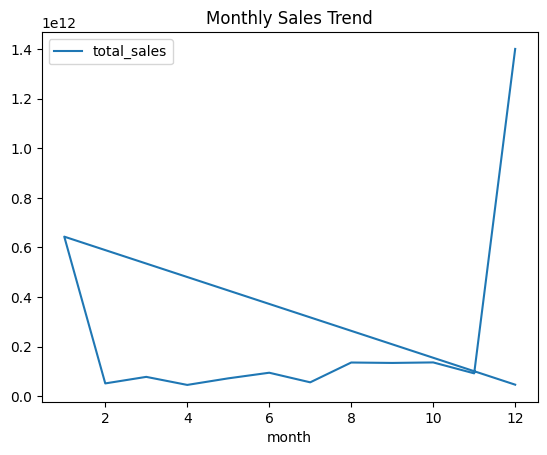

In [52]:
# Monthly Sales Trend
monthly_sales.plot(
    x='month',
    y='total_sales',
    kind='line',
    title='Monthly Sales Trend'
)
plt.show()


In [53]:
# 🔹 13.1 Order Value Distribution
# 💡 Insight to write:
# Mean vs Median → skewness
# Presence of high-value orders (outliers)
df['total_sales'].describe()


count    1.856200e+04
mean     1.610814e+08
std      1.088417e+10
min      3.800000e+01
25%      1.213438e+06
50%      4.549763e+06
75%      1.293130e+07
max      1.364520e+12
Name: total_sales, dtype: float64

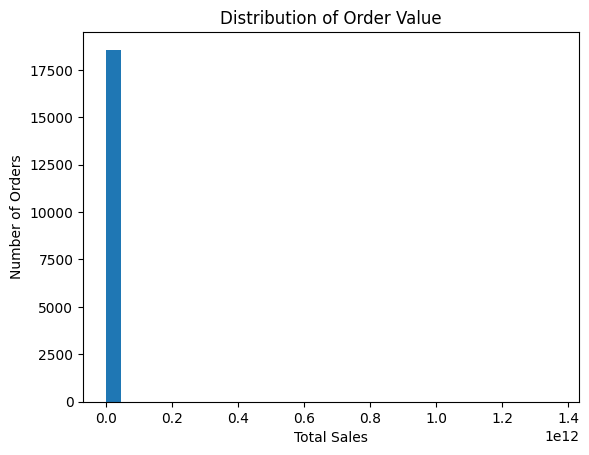

In [54]:
#🔹 13.2 Distribution Plot of Order Values
import matplotlib.pyplot as plt

plt.hist(df['total_sales'], bins=30)
plt.title("Distribution of Order Value")
plt.xlabel("Total Sales")
plt.ylabel("Number of Orders")
plt.show()


In [55]:
# 🔹 13.3 Daily Sales Trend
daily_sales = df.groupby('invoice_date')['total_sales'].sum()
daily_sales.head()


invoice_date
2020-12-01 08:26:00      556480
2020-12-01 08:28:00       26640
2020-12-01 08:34:00     2418534
2020-12-01 08:35:00        5355
2020-12-01 08:45:00    38428114
Name: total_sales, dtype: int64

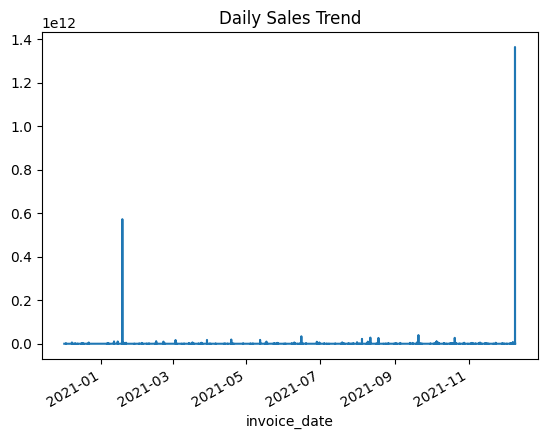

In [56]:
daily_sales.plot(title="Daily Sales Trend")
plt.show()


In [57]:
# 🔹 13.4 Orders per Customer
orders_per_customer = df.groupby('customer_id')['invoice_no'].nunique()
orders_per_customer.describe()



count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: invoice_no, dtype: float64

In [58]:
# 🔹 13.5 Repeat vs One-Time Customers
#  Insight:
# High one-time customers → retention issue
# High repeat customers → strong loyalty
repeat_customers = orders_per_customer[orders_per_customer > 1].count()
one_time_customers = orders_per_customer[orders_per_customer == 1].count()

repeat_customers, one_time_customers


(np.int64(2845), np.int64(1493))

In [59]:
# 🔹 13.6 Revenue Contribution by Customer Type
customer_revenue = df.groupby('customer_id')['total_sales'].sum()

customer_revenue.describe()


count    4.338000e+03
mean     6.892561e+08
std      2.281204e+10
min      1.125000e+03
25%      3.495672e+06
50%      1.264567e+07
75%      4.636067e+07
max      1.364520e+12
Name: total_sales, dtype: float64

In [60]:
# 🔹 13.7 Top 20% Customers Revenue Share
# Insight:
# “Top 20% customers contribute X% of total revenue.”
customer_revenue_sorted = customer_revenue.sort_values(ascending=False)

top_20_percent_count = int(0.2 * len(customer_revenue_sorted))
top_20_revenue = customer_revenue_sorted.head(top_20_percent_count).sum()

total_revenue = customer_revenue_sorted.sum()

(top_20_revenue / total_revenue) * 100


np.float64(98.3649930430763)

In [62]:
#🔹 13.8 Monthly Order Count Trend
monthly_orders = df.groupby(['year', 'month'])['invoice_no'].nunique().reset_index()
monthly_orders


,year,month,invoice_no
0,2020,12,1400
1,2021,1,987
2,2021,2,997
3,2021,3,1321
4,2021,4,1149
5,2021,5,1555
6,2021,6,1393
7,2021,7,1331
8,2021,8,1280
9,2021,9,1755


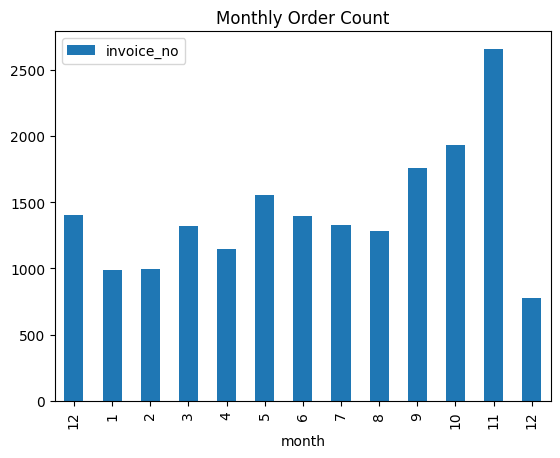

In [63]:
monthly_orders.plot(x='month', y='invoice_no', kind='bar', title='Monthly Order Count')
plt.show()


In [64]:
# 🔹 13.9 Average Order Value by Month
monthly_aov = (
    df.groupby(['year', 'month'])['total_sales']
    .mean()
    .reset_index()
)
monthly_aov


,year,month,total_sales
0,2020,12,3.346422e+07
1,2021,1,6.480193e+08
2,2021,2,5.182891e+07
3,2021,3,5.915030e+07
4,2021,4,3.978300e+07
5,2021,5,4.641591e+07
6,2021,6,6.816850e+07
7,2021,7,4.232207e+07
8,2021,8,1.062180e+08
9,2021,9,7.658109e+07


In [65]:
# 🔹 13.10 Country-wise Order Count
df.groupby('country')['invoice_no'].nunique().sort_values(ascending=False)



country
United Kingdom          16646
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                94
Spain                      90
Portugal                   57
Australia                  57
Switzerland                51
Finland                    41
Italy                      38
Sweden                     36
Norway                     36
Channel Islands            26
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Greece                      5
Malta                       5
Israel                      5
USA                         5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Br

In [66]:
# 📌 STEP 13.1: Set a Reference Date
# We calculate recency relative to the latest invoice date.
import datetime as dt

reference_date = df['invoice_date'].max() + dt.timedelta(days=1)
reference_date


Timestamp('2021-12-10 12:50:00')

In [67]:
# 📌 STEP 13.2: Create RFM Table
rfm = (
    df.groupby('customer_id')
    .agg({
        'invoice_date': lambda x: (reference_date - x.max()).days,  # Recency
        'invoice_no': 'nunique',                                      # Frequency
        'total_sales': 'sum'                                          # Monetary
    })
    .reset_index()
)

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm.head()


,customer_id,recency,frequency,monetary
0,12346.0,326,1,572818087400
1,12347.0,2,7,183923736
2,12348.0,75,4,142225564
3,12349.0,19,1,110901405
4,12350.0,310,1,6587680


In [68]:
# 📌 STEP 13.3: Check RFM Distribution
rfm.describe()

# 👉 This helps understand customer behavior spread.

,customer_id,recency,frequency,monetary
count,4338.000000,4338.000000,4338.000000,4.338000e+03
mean,15300.408022,92.536422,4.272015,6.892561e+08
std,1721.808492,100.014169,7.697998,2.281204e+10
min,12346.000000,1.000000,1.000000,1.125000e+03
25%,13813.250000,18.000000,1.000000,3.495672e+06
50%,15299.500000,51.000000,2.000000,1.264567e+07
75%,16778.750000,142.000000,5.000000,4.636067e+07
max,18287.000000,374.000000,209.000000,1.364520e+12


In [69]:
# 📌 STEP 13.4: Create RFM Scores (1–5)
# We use quintiles
rfm['R_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])


In [70]:
# 📌 STEP 13.5: Create RFM Segment Code
rfm['RFM_score'] = (
    rfm['R_score'].astype(str) +
    rfm['F_score'].astype(str) +
    rfm['M_score'].astype(str)
)

rfm.head()


,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
0,12346.0,326,1,572818087400,1,1,5,115
1,12347.0,2,7,183923736,5,5,5,555
2,12348.0,75,4,142225564,2,4,5,245
3,12349.0,19,1,110901405,4,1,5,415
4,12350.0,310,1,6587680,1,1,2,112


In [72]:
rfm[['R_score','F_score','M_score']].dtypes


R_score    category
F_score    category
M_score    category
dtype: object

In [73]:
rfm[['R_score', 'F_score', 'M_score']] = rfm[['R_score', 'F_score', 'M_score']].astype(int)


In [74]:
rfm[['R_score','F_score','M_score']].dtypes


R_score    int64
F_score    int64
M_score    int64
dtype: object

In [75]:
# 📌 STEP 13.6: Customer Segmentation (Business Labels)
def segment_customer(row):
    if row['R_score'] == 5 and row['F_score'] == 5 and row['M_score'] == 5:
        return 'Champions'
    elif row['R_score'] >= 4 and row['F_score'] >= 4:
        return 'Loyal Customers'
    elif row['R_score'] >= 3 and row['F_score'] <= 2:
        return 'At Risk'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Lost Customers'
    else:
        return 'Potential Customers'


In [76]:
rfm['segment'] = rfm.apply(segment_customer, axis=1)
rfm.head()


,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,segment
0,12346.0,326,1,572818087400,1,1,5,115,Lost Customers
1,12347.0,2,7,183923736,5,5,5,555,Champions
2,12348.0,75,4,142225564,2,4,5,245,Potential Customers
3,12349.0,19,1,110901405,4,1,5,415,At Risk
4,12350.0,310,1,6587680,1,1,2,112,Lost Customers


In [77]:
# 📌 STEP 13.7: Segment Summary (VERY IMPORTANT)
segment_summary = (
    rfm.groupby('segment')
    .agg({
        'customer_id': 'count',
        'monetary': 'sum'
    })
    .rename(columns={'customer_id': 'num_customers', 'monetary': 'total_revenue'})
    .sort_values(by='total_revenue', ascending=False)
)

segment_summary


,num_customers,total_revenue
segment,,
Potential Customers,1464,1498052182086
Champions,269,642533176123
Lost Customers,1065,601156098867
Loyal Customers,870,234359757343
At Risk,670,13891879860


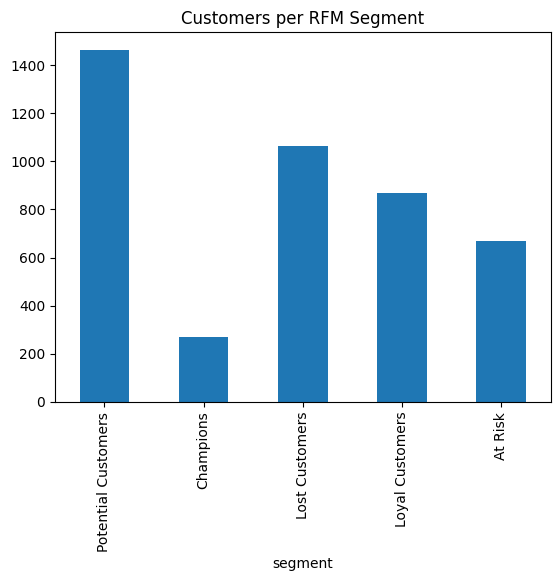

In [78]:
# 📌 STEP 13.8: Visualization
import matplotlib.pyplot as plt

segment_summary['num_customers'].plot(kind='bar', title='Customers per RFM Segment')
plt.show()


In [79]:
rfm.to_csv("rfm_analysis.csv", index=False)
